# Part I : Quel(le) data scientist êtes-vous ?
## Contexte de l’analyse

Elu métier le plus sexy par la Harvard Business Review en octobre 2012, le data scientist représente un profil rare qui exige de nombreuses compétences.

A partir d'un dataset Aquila, vous réaliserez :
- un clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- une prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


## Répondez aux questions 

Bonne chance!

In [154]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.close('all')

### 1) Importer le tableau de données dans un dataframe 

In [134]:
# Import du dataframe "data.csv"
df = pd.read_csv("../data/data.csv",sep=",",dtype = {'Enterprise': "str",
                                                     'Metier': "str",
                                                     'Technologies': 'str',
                                                     "Diplome" : "str",
                                                     "Experience"  : "str",
                                                     "Ville" : "str"})
df.Experience = df.Experience.str.replace(',', '.', regex=False).astype(float)
df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux


In [135]:
df.Metier.value_counts()

Data scientist         3865
Data engineer          2347
Data architecte        2123
Lead data scientist    1228
Name: Metier, dtype: int64

In [164]:
df.Diplome.value_counts()

Master        4971
Phd           2258
Bachelor      1392
No diploma     961
Name: Diplome, dtype: int64

### 2) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes? 

In [136]:
print("il y a ",df.shape[0]," obserbations dans le dataset.")
print("il y a ",df.isna().sum().sum()," valeurs manquantes.")

il y a  9582  obserbations dans le dataset.
il y a  130  valeurs manquantes.


### 3) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

In [137]:
experience_median_datascientist = df.Experience[df.Metier == "Data scientist"].median(axis = 0, skipna = True)
experience_median_dataengineer = df.Experience[df.Metier == "Data engineer"].median(axis = 0, skipna = True)

filter_datascientist = df.Experience[df.Metier == "Data scientist"].isna()
filter_datascientist = filter_datascientist[filter_datascientist].index
filter_dataengineer = df.Experience[df.Metier == "Data engineer"].isna()
filter_dataengineer = filter_dataengineer[filter_dataengineer].index

df.loc[filter_datascientist,"Experience"] = experience_median_datascientist
df.loc[filter_dataengineer,"Experience"] = experience_median_dataengineer

### 4) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne?

In [139]:
mean_experience_by_metier = df.groupby("Metier").agg({'Experience':'mean'})

### 5) Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier

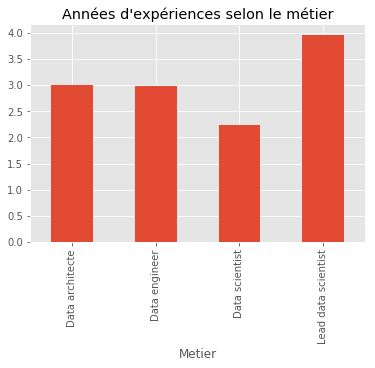

In [158]:
mean_experience_by_metier.plot.bar(title = "Années d'expériences selon le métier", legend = False)
plt.show()

### 6) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert
- Veuillez expliquer votre choix du règle de transformation.  

Pour répondre à cette question, je partirais de deux hypothèses : 

1. La nouvelle variable **Exp_label** représente le niveau de qualification des profils du dataset. J'affirme que le niveau de qualification dépend directement du nombre d'**années d'experiences** et **JAMAIS du diplôme**.
2. Les 4 populations [_débutant, confirmé, avancé, expert_] ne sont pas de tailles égales. J'élimine donc un découpage basé sur les quartiles de la variable expérience. Néanmoins, par expérience, on peut avoir une idée de la distribution de la population : 

 * Il n'existe qu'un petit nombre d'experts. Fixons ce chiffre de manière arbitraire à 10%
 * Il existe grosso modo autant de débutants que de confirmés
 * Il existe à priori un peu moins d'avancés que de débutants. On affirme de manière arbitraire qu'il existe moitié moins d'avancés que de débutants.

Le nouvelle variable **Exp_label** est donc construite de la manière suivante : 
 * **Experts** : Les individus avec un nombre d'années d'expériences situé dans le 1er décile (le top 10%)
 * **Avancés** : le top 20% de la tranche 0-90%
 * **Confirmés** : la tranche 20-60% de la tranche 0-90%
 * **Débutants** : la tranche 60-100% de la tranche 0-90%

### 7) Quelles sont les 5 technologies les plus utilisées? Faites un graphique

In [177]:
series_of_technologies = []
for idx,row in df.iterrows():
    r = row["Technologies"].split("/")
    series_of_technologies += r 
top5_technologies = (pd.Series(series_of_technologies)).value_counts()[:5]

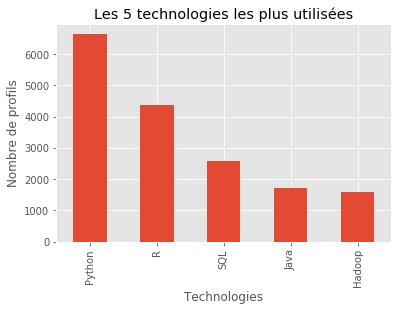

Les 5 technologies les plus uilisées sont Python, R, SQL, Java, Hadoop


In [188]:
top5_technologies.plot.bar(title = "Les 5 technologies les plus utilisées", legend = False)
plt.xlabel('Technologies')
plt.ylabel('Nombre de profils')
plt.show()
print("Les 5 technologies les plus uilisées sont",", ".join(top5_technologies.index.values.tolist()))

### 8) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître 2 clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

In [189]:
df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux


In [192]:
df.Ville.value_counts()

Paris          2015
Lyon           1781
Marseille      1548
Toulouse        871
Lille           771
Bordeaux        692
Nantes          365
Rennes          360
Rouen           315
Strasbourg      309
Toulon          186
Nice            183
Grenoble         99
Montpellier      87
Name: Ville, dtype: int64

### 9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  